# Bonus: Temperature Analysis I

In [19]:
import pandas as pd
from datetime import datetime as dt

In [2]:
# "tobs" is "temperature observations"
df = pd.read_csv('./Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [3]:
# Convert the date column format from string to datetime
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [4]:
#filling precipitation null values with zero for days with no precipitation
df.fillna(0, inplace =True)


In [5]:
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,0.00,73


In [6]:
# Set the date column as the DataFrame index
# Drop the date column
df.set_index('date', inplace=True)
df.head()

# from https://stackoverflow.com/questions/48889914/pandas-set-index-doesnt-drop-the-column

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,0.00,73


### Compare June and December data across all years 

In [63]:
from scipy import stats
import matplotlib.pyplot as plt

In [51]:
# Filter data for desired months
# from https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/subset-time-series-data-python/
# Select all December data - and June data
df[(df.index.month == 6) | (df.index.month == 12)]

,station,prcp,tobs
date,,,
2010-06-01,USC00519397,0.00,78
2010-06-02,USC00519397,0.01,76
2010-06-03,USC00519397,0.00,78
2010-06-04,USC00519397,0.00,76
2010-06-05,USC00519397,0.00,77
...,...,...,...
2017-06-26,USC00516128,0.02,79
2017-06-27,USC00516128,0.10,74
2017-06-28,USC00516128,0.02,74


In [57]:
# Identify the average temperature for June
june_tobs =df[(df.index.month == 6)]['tobs']
june_tobs.mean().round(2)

74.94

In [58]:
# Identify the average temperature for December
dec_tobs=df[(df.index.month == 12)]['tobs']
dec_tobs.mean().round(2)

71.04

In [60]:
# Create collections of temperature data




date
2010-12-01    76
2010-12-03    74
2010-12-04    74
2010-12-06    64
2010-12-07    64
              ..
2016-12-27    71
2016-12-28    71
2016-12-29    69
2016-12-30    65
2016-12-31    65
Name: tobs, Length: 1517, dtype: int64

In [78]:
# Generate some fake data to test with
def gengraphs(loc1=0, loc2=0):
    june_tobs
    dec_tobs

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(june_tobs)), june_tobs, edgecolors ="gray",alpha=0.8, label="june_tobs")
    plt.scatter(range(len(dec_tobs)), dec_tobs, edgecolors ="gray",alpha=0.8, label="dec_tobs")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(june_tobs, 10, density=True, alpha=0.7, label="june_tobs")
    plt.hist(dec_tobs, 10, density=True, alpha=0.7, label="dec_tobs")
    plt.axvline(june_tobs.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(dec_tobs.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return june_tobs, dec_tobs

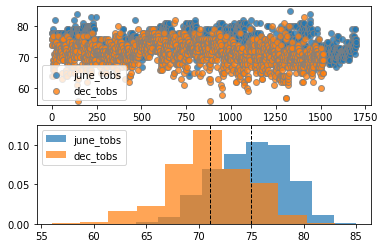

In [79]:
# Generate some data and show the scatter plot
june_tobs, dec_tobs = gengraphs()

In [59]:
# Run paired t-test
We have to independent populations
# Calculate Independent (Two Sample) t-test
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(june_tobs, dec_tobs, equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

### Analysis

* Null Hypothesis : There is no difference between the means of temperature observed in June and in December.
* Alternative Hypothesis : There is a difference between the means of temperature observed in June and in December.

* With a p-values less than 0.05, we reject the null hypothesis that the average temperature observed are the same and    conclude that a significant difference does exist.
